# Week5 - Logistic Regression Assignment

- Run the below cells.
- Complete all of the numbered questions. You may call any packages that we've used in class.  

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/log_reg/employee-turnover-balanced.csv')
df.head()

,left_company,age,frequency_of_travel,department,commuting_distance,education,satisfaction_with_environment,gender,seniority_level,position,satisfaction_with_job,married_or_single,last_raise_pct,last_performance_rating,total_years_working,years_at_company,years_in_current_job,years_since_last_promotion,years_with_current_supervisor
0,No,37,Travel_Rarely,Sales,16,4,4,Male,2,Sales Executive,3,Divorced,19,3,9,1,0,0,0
1,No,39,Travel_Rarely,Research & Development,3,2,3,Male,2,Laboratory Technician,3,Divorced,15,3,11,10,8,0,7
2,No,52,Travel_Frequently,Research & Development,25,4,3,Female,4,Manufacturing Director,4,Married,22,4,31,9,8,0,0
3,No,50,Non-Travel,Sales,1,3,4,Female,2,Sales Executive,3,Married,12,3,19,18,7,0,13
4,No,44,Travel_Rarely,Research & Development,4,3,4,Male,2,Healthcare Representative,2,Single,12,3,10,5,2,2,3


## Data Definitions
- `left_company`: Whether individual left the company or not. This is the target variable.  
- `age`: Age of individual.
- `frequency_of_travel`: How often person travels for work.  
- `department`: Department person works(worked).  
- `commuting_distance`: Distance person lives from office.  
- `education`: Highest education category.  
- `satisfaction_with_environment`: Satisfaction of environment, on lickert scale.  
- `gender`: Gender of individual.  
- `seniority_level`: Seniority level of individual.  
- `position`: Last position held at the company.  
- `satisfaction_with_job`: Satisfaction of their job, on lickert scale.  
- `married_or_single`: Marital status of person.  
- `last_raise_pct`: Percent increase their last raise represented.  
- `last_performance_rating`: Most recent annual performance rating, on lickert scale.  
- `total_years_working`: Number of years the individual has spent working in their career.  
- `years_at_company`: Number of years the individual has been at the company, regardless of position.  
- `years_in_current_job`: Number of years the individual has been in their current position.  
- `years_since_last_promotion`: Years since the person had their last promotion.  
- `years_with_current_supervisor`: Years the person has had their current supervisor.

# Question 1
- What is the distribution of the target (`left_company`)?  
- Do you have any concerns on class imbalances?

Distribution of people who left the company: left_company
No     500
Yes    500
Name: count, dtype: int64


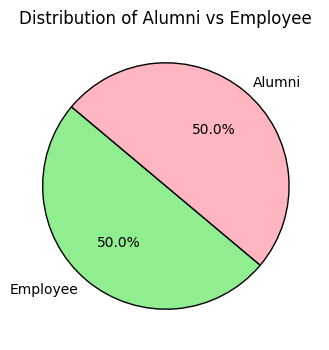

In [21]:
# insert code
target_distribution = df['left_company'].value_counts()
print('Distribution of people who left the company:', target_distribution)

plt.figure(figsize=(4,4))
plt.pie(target_distribution, labels=['Employee','Alumni'], autopct='%1.1f%%' , startangle=140, colors=['lightgreen', 'lightpink'], wedgeprops={'edgecolor':'black'})
plt.title('Distribution of Alumni vs Employee')
plt.show()

**I do not see any class imbalances as the number of people who left the company are 500 where as who are working currently are even 500 so no imbalance detected.**

# Question 2
- Do a quick EDA
- Can you create new features that captures the relation with the target better?

In [22]:
# you can use as many blocks as you need here.
df.head()

,left_company,age,frequency_of_travel,department,commuting_distance,education,satisfaction_with_environment,gender,seniority_level,position,satisfaction_with_job,married_or_single,last_raise_pct,last_performance_rating,total_years_working,years_at_company,years_in_current_job,years_since_last_promotion,years_with_current_supervisor
0,No,37,Travel_Rarely,Sales,16,4,4,Male,2,Sales Executive,3,Divorced,19,3,9,1,0,0,0
1,No,39,Travel_Rarely,Research & Development,3,2,3,Male,2,Laboratory Technician,3,Divorced,15,3,11,10,8,0,7
2,No,52,Travel_Frequently,Research & Development,25,4,3,Female,4,Manufacturing Director,4,Married,22,4,31,9,8,0,0
3,No,50,Non-Travel,Sales,1,3,4,Female,2,Sales Executive,3,Married,12,3,19,18,7,0,13
4,No,44,Travel_Rarely,Research & Development,4,3,4,Male,2,Healthcare Representative,2,Single,12,3,10,5,2,2,3


In [23]:
df.tail()

,left_company,age,frequency_of_travel,department,commuting_distance,education,satisfaction_with_environment,gender,seniority_level,position,satisfaction_with_job,married_or_single,last_raise_pct,last_performance_rating,total_years_working,years_at_company,years_in_current_job,years_since_last_promotion,years_with_current_supervisor
995,Yes,39,Travel_Rarely,Sales,3,2,4,Female,2,Sales Executive,3,Married,18,3,12,1,0,0,0
996,Yes,26,Travel_Rarely,Sales,4,4,4,Male,2,Sales Executive,4,Single,12,3,8,8,7,7,4
997,Yes,18,Travel_Frequently,Sales,5,3,2,Male,1,Sales Representative,2,Single,14,3,0,0,0,0,0
998,Yes,28,Travel_Rarely,Research & Development,2,4,1,Male,1,Research Scientist,4,Married,13,3,5,3,2,2,2
999,Yes,29,Travel_Frequently,Sales,13,3,1,Female,2,Sales Executive,2,Single,11,3,7,5,3,0,0


In [24]:
df.describe()

,age,commuting_distance,education,satisfaction_with_environment,seniority_level,satisfaction_with_job,last_raise_pct,last_performance_rating,total_years_working,years_at_company,years_in_current_job,years_since_last_promotion,years_with_current_supervisor
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.713000,9.593000,2.864000,2.597000,1.909000,2.621000,15.244000,3.166000,10.20600,6.420000,3.857000,2.065000,3.754000
std,9.366556,8.118452,1.029837,1.122431,1.067642,1.120095,3.752939,0.372267,7.73637,6.165518,3.513815,3.094568,3.500534
min,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.000000,3.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,2.000000,2.000000,2.000000,1.000000,2.000000,12.000000,3.000000,5.00000,2.000000,2.000000,0.000000,1.000000
50%,34.000000,8.000000,3.000000,3.000000,2.000000,3.000000,14.000000,3.000000,9.00000,5.000000,2.000000,1.000000,2.000000
75%,42.000000,15.000000,4.000000,4.000000,2.000000,4.000000,18.000000,3.000000,13.00000,9.000000,7.000000,2.000000,7.000000
max,60.000000,29.000000,5.000000,4.000000,5.000000,4.000000,25.000000,4.000000,40.00000,40.000000,18.000000,15.000000,17.000000


In [25]:
df.dtypes

,0
left_company,object
age,int64
frequency_of_travel,object
department,object
commuting_distance,int64
education,int64
satisfaction_with_environment,int64
gender,object
seniority_level,int64
position,object


In [26]:
df.columns

Index(['left_company', 'age', 'frequency_of_travel', 'department',
       'commuting_distance', 'education', 'satisfaction_with_environment',
       'gender', 'seniority_level', 'position', 'satisfaction_with_job',
       'married_or_single', 'last_raise_pct', 'last_performance_rating',
       'total_years_working', 'years_at_company', 'years_in_current_job',
       'years_since_last_promotion', 'years_with_current_supervisor'],
      dtype='object')

In [27]:
df.isnull().sum()

,0
left_company,0
age,0
frequency_of_travel,0
department,0
commuting_distance,0
education,0
satisfaction_with_environment,0
gender,0
seniority_level,0
position,0


In [28]:
df.sample(5)

,left_company,age,frequency_of_travel,department,commuting_distance,education,satisfaction_with_environment,gender,seniority_level,position,satisfaction_with_job,married_or_single,last_raise_pct,last_performance_rating,total_years_working,years_at_company,years_in_current_job,years_since_last_promotion,years_with_current_supervisor
738,Yes,28,Travel_Rarely,Research & Development,12,1,3,Female,1,Laboratory Technician,4,Married,11,3,1,1,1,0,0
577,Yes,25,Travel_Rarely,Sales,5,3,3,Male,2,Sales Executive,3,Single,11,3,6,6,4,0,3
180,No,25,Travel_Rarely,Sales,3,1,3,Male,2,Sales Executive,1,Married,18,3,5,5,3,0,3
69,No,31,Travel_Rarely,Sales,8,2,1,Male,3,Sales Executive,4,Divorced,18,3,13,13,7,9,9
661,Yes,28,Travel_Rarely,Research & Development,5,4,3,Male,1,Laboratory Technician,3,Single,13,3,2,2,2,2,2


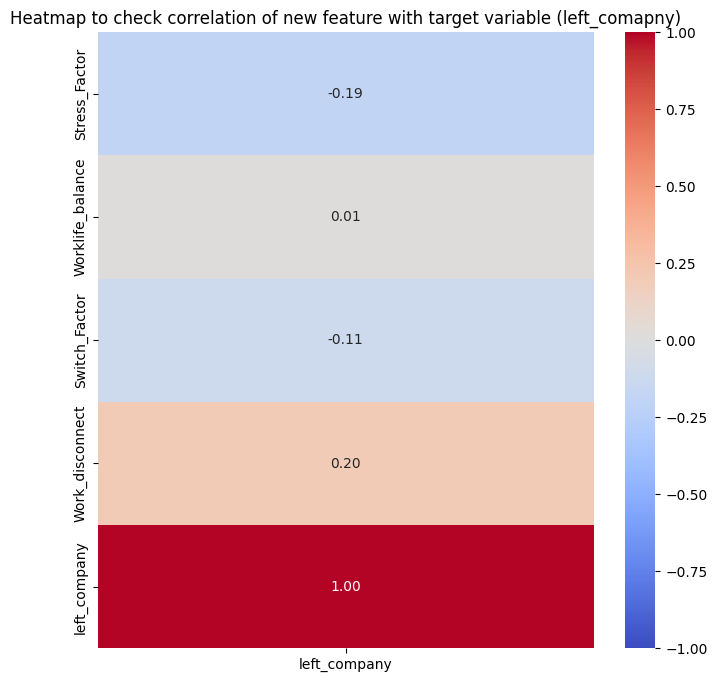

In [29]:
#To analyze if any other feature has better correlation with target variable left_company

#1. Stress: I feel this is directly co-related to the decision of working with the company or not.
df['Stress_Factor'] = df['seniority_level'] * (1- df['satisfaction_with_job'] / 10)

#2. Worklife balance: Another important management factor.
df['Worklife_balance'] = df['commuting_distance'] * (df['satisfaction_with_environment'] / 10)

#3. Switching Job: people you are young in age often switch jobs compare to experienced people.
df['Switch_Factor'] = df['years_at_company'] / (df['last_raise_pct'] + 1)

#4. Work disconnect is often people who are unhappy with what they are doing.
df['Work_disconnect'] = (1 - df['satisfaction_with_job'] / 10) * (1 - df['satisfaction_with_environment'] / 10)

feature_new = ['Stress_Factor', 'Worklife_balance', 'Switch_Factor', 'Work_disconnect']
df['left_company'] = df['left_company'].map({'Yes':1, 'No':0})
feature_new_corr = df[ feature_new + ['left_company']].corr()

#Heatmap to determeine highest correlation factor
import seaborn as sns
plt.figure(figsize=(8,8))
sns.heatmap(feature_new_corr[['left_company']], cmap='coolwarm', fmt='.2f',annot=True, vmin=-1, vmax=1)
plt.title('Heatmap to check correlation of new feature with target variable (left_comapny)')
plt.show()

**So the most closely related variable with the target variable (left_company) from the new features is Work disconnect with a value of 0.20.**

# Question 3
- Create and print a list of the variables that you would treat as numerical and another list for the variables that you would treat as categorical.  
- Explain your choices.

In [30]:
# numerical_vars = []
# categorical_Vars = []
Numerical = [col for col in df.columns if df[col].dtype == 'int64']
Categorical = [col for col in df.columns if df[col].dtype == 'object']

Numerical.remove('left_company')

print('numerical_vars:', Numerical)
print('categorical_Vars:', Categorical)

numerical_vars: ['age', 'commuting_distance', 'education', 'satisfaction_with_environment', 'seniority_level', 'satisfaction_with_job', 'last_raise_pct', 'last_performance_rating', 'total_years_working', 'years_at_company', 'years_in_current_job', 'years_since_last_promotion', 'years_with_current_supervisor']
categorical_Vars: ['frequency_of_travel', 'department', 'gender', 'position', 'married_or_single']




1. **Numerical:** These features contains numbers and hence I have sorted as per the data type 'int' and considered them as Numerical values.
example: Age
2. **Categorical:** These features contains labels and hence I have sorted as per the data type 'object' and considered them as Categorical values.
example: Gender

# Question 4
- Split the data into training and test sets.  
- Use 20% of the data for test and a random state of 124.  

In [31]:
# insert code here
from sklearn.model_selection import train_test_split

X = df.drop(columns=['left_company']) #all features
y = df['left_company'] #target variable
X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=0.2, random_state=124)
print('Training set:', X_training.shape)
print('Testing set:', X_test.shape)

Training set: (800, 22)
Testing set: (200, 22)


# Question 5
- Create a pipeline to process the numerical data.  
- Create a pipeline to process the categorical data.  

Verify each pipeline contains the columns you would expect using a fit_transform on the training data, i.e., print the shapes of the fit_transforms for each pipeline.

In [32]:
# insert code here
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

numvar_pipeline = Pipeline([('handling_missing_values', SimpleImputer(strategy='median')),('value_scaling', StandardScaler())])
catvar_pipeline = Pipeline([('handling_missing_values', SimpleImputer(strategy='most_frequent')),('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'))])

X_training_Num = numvar_pipeline.fit_transform(X_training[Numerical])
X_training_Cat = catvar_pipeline.fit_transform(X_training[Categorical])

print('The shapes of the fit_transforms for Numerical pipeline:', X_training_Num)
print('The shapes of the fit_transforms for Categorical pipeline:', X_training_Cat)

The shapes of the fit_transforms for Numerical pipeline: [[-0.08443347 -0.33873757  0.12174871 ...  0.32851531 -0.34561971
   0.63351643]
 [-0.29485956  0.49987003  0.12174871 ...  0.04408647 -0.66306606
   0.06597651]
 [ 1.17812306  0.49987003  1.08609489 ...  0.897373   -0.34561971
   0.91728638]
 ...
 [ 0.44163175  0.02066569  1.08609489 ...  0.897373   -0.34561971
   0.91728638]
 [-0.18964651  0.7394722   1.08609489 ... -0.52477122  0.28927298
  -1.06910331]
 [-0.4000726  -0.81794191 -0.84259748 ...  0.897373    1.55905837
   0.91728638]]
The shapes of the fit_transforms for Categorical pipeline:   (0, 1)	1.0
  (0, 2)	1.0
  (0, 4)	1.0
  (0, 8)	1.0
  (0, 14)	1.0
  (1, 1)	1.0
  (1, 2)	1.0
  (1, 4)	1.0
  (1, 6)	1.0
  (1, 13)	1.0
  (2, 2)	1.0
  (2, 4)	1.0
  (2, 10)	1.0
  (2, 13)	1.0
  (3, 1)	1.0
  (3, 3)	1.0
  (3, 4)	1.0
  (3, 11)	1.0
  (4, 1)	1.0
  (4, 2)	1.0
  (4, 6)	1.0
  (4, 13)	1.0
  (5, 1)	1.0
  (5, 4)	1.0
  (5, 5)	1.0
  :	:
  (794, 3)	1.0
  (794, 4)	1.0
  (794, 11)	1.0
  (794, 1

# Question 6
- Create a pipeline that combines the pre-processing and implements a logistic regression model.  
- Print the accuracy on the training set and the test set.
- Do you have any concerns of overfitting based on the differences between the two accuracy scores?

In [33]:
# insert code here
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression

data_processing_pipeline = ColumnTransformer(transformers=[('Numerical_pipe',numvar_pipeline, Numerical),('Categorical_pipe', catvar_pipeline, Categorical)])
print('Combined data pre-processing pipeline:', data_processing_pipeline)

Combined data pre-processing pipeline: ColumnTransformer(transformers=[('Numerical_pipe',
                                 Pipeline(steps=[('handling_missing_values',
                                                  SimpleImputer(strategy='median')),
                                                 ('value_scaling',
                                                  StandardScaler())]),
                                 ['age', 'commuting_distance', 'education',
                                  'satisfaction_with_environment',
                                  'seniority_level', 'satisfaction_with_job',
                                  'last_raise_pct', 'last_performance_rating',
                                  'total_years_working', 'years_at_company',
                                  'years_in_current_job',
                                  'years_since_last_promotion',
                                  'years_with_current_supervisor']),
                                ('Categori

In [34]:
LR_Pipleline = Pipeline([('pre-processing', data_processing_pipeline), ('Regression', LogisticRegression(max_iter=1000))])

In [35]:
from sklearn.metrics import accuracy_score

LR_Pipleline.fit(X_training, y_training)
Y_training_predection = LR_Pipleline.predict(X_training)
Y_testing_predection = LR_Pipleline.predict(X_test)

training_set_accuracy = accuracy_score(y_training, Y_training_predection)
test_set_accuracy = accuracy_score(y_test, Y_testing_predection)

print('Accuracy on the training set :',training_set_accuracy * 100,'%')
print('Accuracy on the testing set:',test_set_accuracy *100,'%')

Accuracy on the training set : 73.375 %
Accuracy on the testing set: 66.0 %


**Yes, there is an issue about overfitting as the difference between these two values is of 7.38% which is high. The accuracy on training set is 0.73 which is high than that of accuracy on testing set which is 0.66 which states that the perforfamce has been reduced on test set and model may have memorized the training set data.**

# Question 7
Your supervisor asked you to extract learned parameters from the trained model. Give it as a dictionary.

Another team will use these learned parameters to write a predictor in postgres.

In [36]:
from collections import defaultdict

dictionary = {'int': LR_Pipleline.named_steps['Regression'].intercept_[0],'coef': dict(zip(Numerical + list(LR_Pipleline.named_steps['pre-processing'].transformers_[1][1].get_feature_names_out(Categorical)), LR_Pipleline.named_steps['Regression'].coef_[0]))}
print('Dictionary:', dictionary)

Dictionary: {'int': -1.9594481793612142, 'coef': {'age': 0.005943493558530373, 'commuting_distance': 0.29037061730130076, 'education': -0.26134589892315707, 'satisfaction_with_environment': -0.36886520996494815, 'seniority_level': -0.3347650380798041, 'satisfaction_with_job': -0.4429568175819741, 'last_raise_pct': -0.21101998232313443, 'last_performance_rating': 0.04572990431076852, 'total_years_working': 0.08674216075996767, 'years_at_company': 0.649118078985208, 'years_in_current_job': -0.5424906108951318, 'years_since_last_promotion': 0.32133429488708887, 'years_with_current_supervisor': -0.425965328218377, 'frequency_of_travel_Travel_Frequently': 0.9280905134809909, 'frequency_of_travel_Travel_Rarely': 0.7243607802787946, 'department_Research & Development': -0.11687365720232351, 'department_Sales': 0.08548524526822812, 'gender_Male': 0.26350187541908776, 'position_Human Resources': 0.7518284668755751, 'position_Laboratory Technician': 0.8755608587272048, 'position_Manager': -0.391